In [2]:
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = netCDF4.Dataset('tavg1_2d_ocn_Nx-202109201458output.17833.webform.nc4', mode='r')
dataset
#tomado de https://www.kaggle.com/datasets/brsdincer/ocean-data-climate-change-nasa?resource=download
#OCEAN DATA / CLIMATE CHANGE / NASA
#NETCDF FORMAT / NEW / 2018-2021

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(1152), latitude(721)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 tdrop(time, latitude, longitude), float32 tbar(time, latitude, longitude), float32 tskinice(time, latitude, longitude), float32 rainocn(time, latitude, longitude), float32 delts(time, latitude, longitude)
    groups: 

In [4]:

# Ver las variables disponibles
print(dataset.variables.keys())

# Ver las dimensiones
print(dataset.dimensions.keys())



dict_keys(['time', 'longitude', 'latitude', 'tdrop', 'tbar', 'tskinice', 'rainocn', 'delts'])
dict_keys(['time', 'longitude', 'latitude'])


In [5]:
# Ver los atributos de una variable específica (ejemplo: 'sea_surface_temperature')
print(dataset.variables['tskinice'])

<class 'netCDF4.Variable'>
float32 tskinice(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: sea_ice_skin_temperature
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used


In [6]:
# Extraer variables necesarias
temperatura = dataset.variables['tskinice'][:]  # numpy array
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]
tiempo = dataset.variables['time'][:]

# Aplanar las dimensiones para crear un DataFrame
df = pd.DataFrame({
    'tiempo': np.repeat(tiempo, len(lat) * len(lon)),
    'lat': np.tile(np.repeat(lat, len(lon)), len(tiempo)),
    'lon': np.tile(lon, len(tiempo) * len(lat)),
    'temperatura': temperatura.flatten()
})

In [7]:
df

,tiempo,lat,lon,temperatura
0,0.5,-90.0,-180.0000,NaN
1,0.5,-90.0,-179.6875,NaN
2,0.5,-90.0,-179.3750,NaN
3,0.5,-90.0,-179.0625,NaN
4,0.5,-90.0,-178.7500,NaN
...,...,...,...,...
19934203,23.5,90.0,178.4375,273.160034
19934204,23.5,90.0,178.7500,273.160034
19934205,23.5,90.0,179.0625,273.160034
19934206,23.5,90.0,179.3750,273.160034


In [8]:

# Elegimos una ubicación específica
lat0 = 14.5
lon0 = 135
df_punto = df[(df['lat'] == lat0) & (df['lon'] == lon0)].sort_values('tiempo')
df_punto

,tiempo,lat,lon,temperatura
482544,0.5,14.5,135.0,273.148254
1313136,1.5,14.5,135.0,273.146057
2143728,2.5,14.5,135.0,273.155518
2974320,3.5,14.5,135.0,273.160034
3804912,4.5,14.5,135.0,273.160034
4635504,5.5,14.5,135.0,273.160034
5466096,6.5,14.5,135.0,273.152618
6296688,7.5,14.5,135.0,273.160034
7127280,8.5,14.5,135.0,273.160034
7957872,9.5,14.5,135.0,273.149048


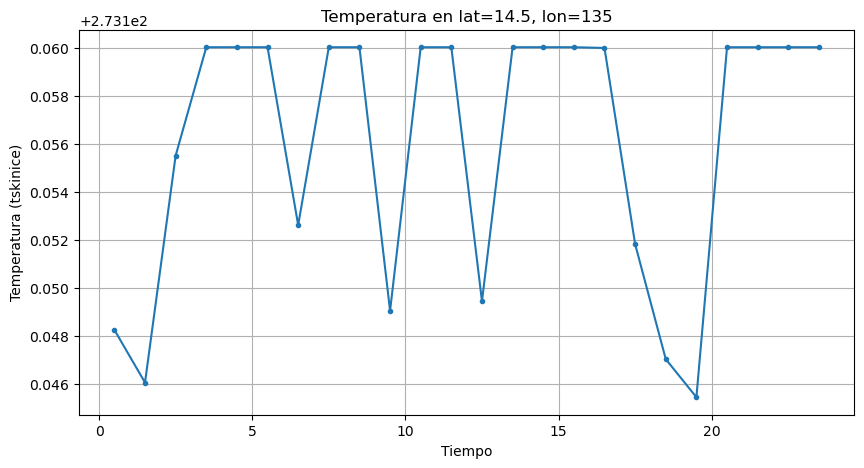

In [9]:
df_punto = df[(df['lat'] == lat0) & (df['lon'] == lon0)].sort_values('tiempo')
plt.figure(figsize=(10, 5))
plt.plot(df_punto['tiempo'], df_punto['temperatura'], marker='.')
plt.title(f'Temperatura en lat={lat0}, lon={lon0}')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (tskinice)')
plt.grid(True)
plt.show()


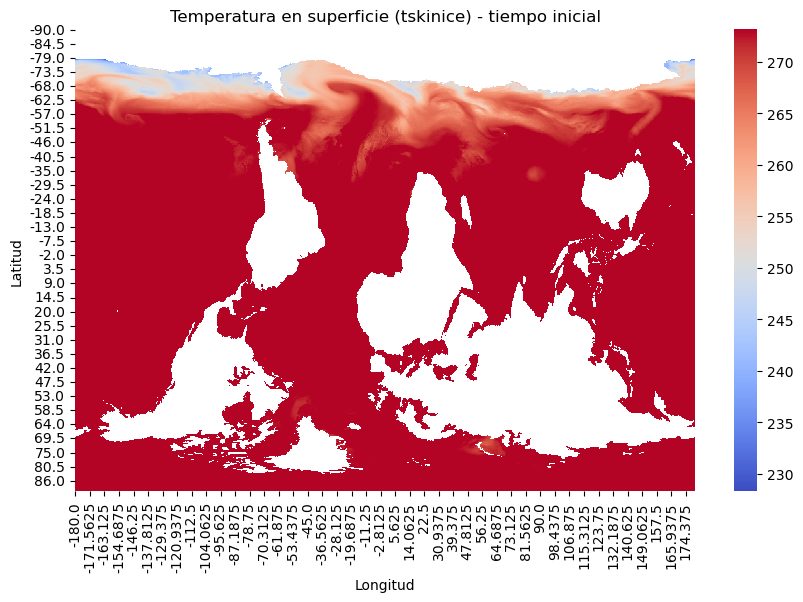

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar por el primer valor de tiempo
df_momento = df[df['tiempo'] == df['tiempo'].unique()[0]]

# Pivotar para crear una matriz lat-lon
pivot = df_momento.pivot(index='lat', columns='lon', values='temperatura')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Temperatura en superficie (tskinice) - tiempo inicial')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()
